In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import logsumexp

%matplotlib inline

In [4]:
#data load

data=np.load('X.npy')
n = np.shape(data)[0] #100
d = np.shape(data)[1] #20

In [52]:
#Initializre

T = 30 # We can change this to iterate more times
a = np.zeros((T, 3))
b = np.zeros((T, 3))
c = np.zeros((T, 3))
pi = np.ones((T, d-3))/(d-3)

a[0,] = [0.5,0.4,0.1]
b[0,] = [0.5,0.4,0.1]
c[0,] = [0.5,0.4,0.1]

V = np.zeros((n,d-3))
W = np.zeros((n,d-3)) 
VV = np.zeros(n) #Sum of V

In [53]:
#Log-Probability function

def LogP(i,k,a,b,c,pi): 
    temp = 0
    temp += np.log(pi[k]) 
    for j in range(0, d-3):
        if (j == k or j == (k+1)):
            temp += np.log(a[data[i,j]])
        elif (j == (k+2) or j == (k+3)): 
            temp += np.log(b[data[i,j]])
        else:
            temp += np.log(c[data[i,j]])
    return temp

In [54]:
#Construct Initial Weights

for i in range(n):
    for k in range(d-3):
        V[i,k] = LogP(i,k,a[0,:],b[0,:],c[0,:],pi[0,])
        
for i in range(n):
    VV[i] = logsumexp(V[i,])
    
for i in range(n):
    for k in range(d-3):
        W[i,k] = np.exp(V[i,k])/np.exp(VV[i])

In [55]:
#Update parameters

for t in range(1,T):
    a_num = np.zeros(3);
    b_num = np.zeros(3);
    c_num = np.zeros(3);

    #Update a, b, c, pi
    for k in range(0,d-3): 
        for i in range(0,n):
            for j in range(0,d):
                if (j==k or j==(k+1)):
                    a_num[data[i,j]] = a_num[data[i,j]] + W[i,k] 
                elif (j==(k+2) or j==(k+3)):
                    b_num[data[i,j]] = b_num[data[i,j]] + W[i,k] 
                else:
                    c_num[data[i,j]] = c_num[data[i,j]] + W[i,k]
                    
    a[t,:] = a_num / np.sum(a_num)
    b[t,:] = b_num / np.sum(b_num) 
    c[t,:] = c_num / np.sum(c_num)
    pi[t,:] = np.sum(W,0)/np.sum(W)
    
    #Update W
    for i in range(n):
        for k in range(d-3):
            V[i,k] = LogP(i,k,a[t,:],b[t,:],c[t,:],pi[t,]) 
        for i in range(n):
            VV[i] = logsumexp(V[i,]) 
        for i in range(n):
            for k in range(d-3):
                W[i,k] = np.exp(V[i,k])/np.exp(VV[i])

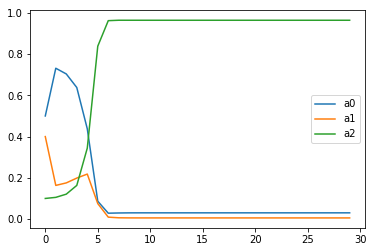

In [56]:
X=range(0,T)
plt.plot(X, a[:,0])
plt.plot(X, a[:,1])
plt.plot(X, a[:,2])
plt.legend(['a0', 'a1', 'a2'], loc='right')

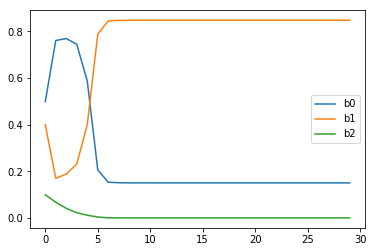

In [57]:
plt.plot(X, b[:,0])
plt.plot(X, b[:,1])
plt.plot(X, b[:,2])
plt.legend(['b0', 'b1', 'b2'], loc='right')

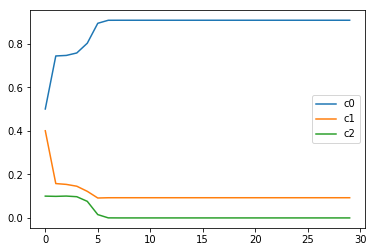

In [58]:
plt.plot(X, c[:,0])
plt.plot(X, c[:,1])
plt.plot(X, c[:,2])
plt.legend(['c0', 'c1', 'c2'], loc='right')

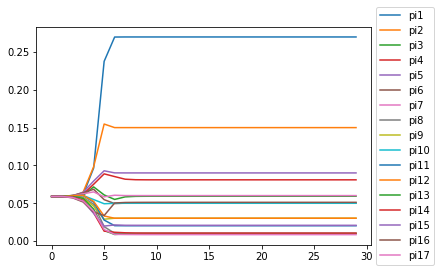

In [59]:
plt.plot(X, pi)
plt.legend(['pi1', 'pi2', 'pi3', 'pi4', 'pi5', 'pi6'\
           ,'pi7', 'pi8', 'pi9', 'pi10', 'pi11', 'pi12'\
           ,'pi13', 'pi14', 'pi15', 'pi16', 'pi17']\
          ,loc='center left', bbox_to_anchor=(1, 0.5))

In [60]:
print('Converged results are following:')
print('a0  = ', round(a[-1,0],5),', a1  = ', round(a[-1,1],4),', a2  = ', round(a[-1,2],4) )
print('b0  = ', round(b[-1,0],5),', b1  = ', round(b[-1,1],4),', b2  = ', round(b[-1,2],4) )
print('c0  = ', round(c[-1,0],5),', c1  = ', round(c[-1,1],4),', c2  = ', round(c[-1,2],4) )
for i in range(0,len(pi[0])):
    print('p',i+1,' = ', round(pi[-1,i],4))

Converged results are following:
a0  =  0.03026 , a1  =  0.0056 , a2  =  0.9641
b0  =  0.15099 , b1  =  0.8481 , b2  =  0.0009
c0  =  0.90734 , c1  =  0.0927 , c2  =  0.0
p 1  =  0.27
p 2  =  0.15
p 3  =  0.0591
p 4  =  0.0809
p 5  =  0.09
p 6  =  0.05
p 7  =  0.06
p 8  =  0.01
p 9  =  0.0301
p 10  =  0.0498
p 11  =  0.0201
p 12  =  0.03
p 13  =  0.0097
p 14  =  0.0103
p 15  =  0.0206
p 16  =  0.0511
p 17  =  0.0083
